In [84]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [85]:
sales=pd.read_csv('sales_data_1.csv')
sales.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [86]:
sales

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


In [87]:
#Calculate profit
sales['Revenue']=sales['Selling price']*sales['Quantity sold']
sales['Profit']=(sales['Selling price']-sales['Buying price'])*sales['Quantity sold']
sales['Cost']=(sales['Buying price'])*sales['Quantity sold']
sales.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Revenue,Profit,Cost
0,21/08/23,Vendor6,72.11,Customer7,91.58,44,4029.52,856.68,3172.84
1,21/08/23,Vendor4,75.08,Customer7,83.71,17,1423.07,146.71,1276.36
2,21/08/23,Vendor7,83.93,Customer2,103.76,15,1556.40,297.45,1258.95
3,21/08/23,Vendor7,52.01,Customer3,64.53,7,451.71,87.64,364.07
4,21/08/23,Vendor2,98.91,Customer5,140.92,1,140.92,42.01,98.91


In [88]:
#q1) total gross margin
revenue=sum(sales['Revenue'])
cost=sum(sales['Cost'])#sales['Buying price']*sales['Quantity sold']
overall_gross_margin=(revenue-cost)/revenue
overall_gross_margin*=100
print("the overall gross margin percentage is : ",overall_gross_margin)

the overall gross margin percentage is :  24.633558915188363


In [89]:
#q2) most profitable vendor is the vendor who the firm payed more money to:  that is no.of units sold * cost per unit 
vendor_tot= sales.groupby('Firm bought from')['Cost'].sum()
most_profit_vendor=vendor_tot.idxmax()

In [90]:
vendor_tot

Firm bought from
Vendor1      5357.15
Vendor10     8400.01
Vendor2      5407.49
Vendor3     16767.60
Vendor4     20351.91
Vendor5      5873.62
Vendor6      4269.92
Vendor7     16828.71
Vendor8      1140.10
Vendor9     11925.05
Name: Cost, dtype: float64

In [91]:
most_profit_vendor

'Vendor4'

In [92]:
#Q3)least profitable vendor is the vendor who the firm payed least money to:  that is no.of units sold * cost per unit 
least_profit_vendor=vendor_tot.idxmin()
least_profit_vendor

'Vendor8'

In [93]:
#Q4 day of the week was most profitable for firm
days_tot=sales.groupby('Date')['Profit'].sum()
most_profit_day=days_tot.idxmax()

In [94]:
days_tot

Date
21/08/23    6847.34
22/08/23    3305.35
23/08/23    4392.47
24/08/23    4866.03
25/08/23    3761.94
26/08/23    5223.16
27/08/23    3086.46
Name: Profit, dtype: float64

In [95]:
most_profit_day

'21/08/23'

In [96]:
#exact day can be found out with datetime function
def findday(s):
    date_object = datetime.strptime(most_profit_day, '%d/%m/%y')
    day = date_object.day
    day_of_week = date_object.weekday()
    day_name = date_object.strftime('%A')
    return day_name

In [97]:
max_profit_day=findday(most_profit_day)
max_profit_day

'Monday'

In [98]:
#Q5) day of the week was least profitable for firm
least_profit_day=days_tot.idxmin()
least_profit_day

'27/08/23'

In [99]:
min_profit_day=findday(least_profit_day)
min_profit_day

'Monday'

**Part 2**

In [100]:
sales2=pd.read_csv('sales_data_2.csv')
sales2.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [101]:
sales2['Gross Profit']=(sales2['Selling price']-sales2['Buying price'])*sales2['Quantity sold']
sales2.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Gross Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,856.68
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,297.45
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,87.64
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01


In [102]:
#q6 calculating 3 day-avg for every day gross profit
profit1=list(np.array(sales2['Gross Profit']))

In [103]:
daydf=pd.DataFrame()
days_tot1=sales2.groupby('Date')['Gross Profit'].sum()

In [104]:
l1=list(days_tot1)
l1
date=sales2.Date.unique()

In [105]:
daydf["Date"]=date
daydf["each_day_avg_gross_profit"]=l1
daydf

,Date,each_day_avg_gross_profit
0,2023-08-21,6847.34
1,2023-08-22,3305.35
2,2023-08-23,4392.47
3,2023-08-24,4866.03
4,2023-08-25,3761.94
5,2023-08-26,5223.16
6,2023-08-27,3086.46


In [106]:
profit1=list(daydf["each_day_avg_gross_profit"])


In [107]:
list2=[] # 3day avg profit list
temp=[0,0,0]
for i in profit1:
    temp.append(i)
    temp.pop(0)
    avg=sum(temp)/3
    list2.append(avg)

In [108]:
daydf["3dayavg"]=list2

In [109]:
daydf

,Date,each_day_avg_gross_profit,3dayavg
0,2023-08-21,6847.34,2282.446667
1,2023-08-22,3305.35,3384.230000
2,2023-08-23,4392.47,4848.386667
3,2023-08-24,4866.03,4187.950000
4,2023-08-25,3761.94,4340.146667
5,2023-08-26,5223.16,4617.043333
6,2023-08-27,3086.46,4023.853333


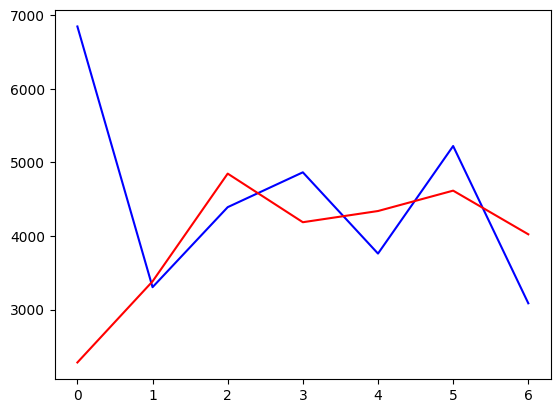

In [110]:
# Q7)insights into how this 3-day trend changes over the time period covered in the dataset.
plt.plot(daydf["each_day_avg_gross_profit"],color='blue')
plt.plot(daydf["3dayavg"],color='red')

In [111]:
#Q8 to optimize the sales process to ensure gross margin is maximized , we should find the under performing vendors and customers 
sales2['Gross Margin'] = (sales2['Gross Profit'] / (sales2['Selling price']*sales2['Quantity sold'])) * 100


In [112]:
#to find under performing vendors:
average_margin_by_vendor = sales2.groupby('Firm bought from')['Gross Margin'].mean()
average_margin_by_vendor

Firm bought from
Vendor1     20.506424
Vendor10    20.640650
Vendor2     21.464251
Vendor3     25.114488
Vendor4     21.053258
Vendor5     20.697900
Vendor6     18.580492
Vendor7     21.530024
Vendor8     17.319641
Vendor9     27.041627
Name: Gross Margin, dtype: float64

In [113]:
underperforming_vendors = average_margin_by_vendor[average_margin_by_vendor < average_margin_by_vendor.mean()]
print("Underperforming Vendors:")
print(underperforming_vendors)

Underperforming Vendors:
Firm bought from
Vendor1     20.506424
Vendor10    20.640650
Vendor4     21.053258
Vendor5     20.697900
Vendor6     18.580492
Vendor8     17.319641
Name: Gross Margin, dtype: float64


In [114]:
# we can fire the least performing vendor or re-negotiate terms

In [115]:
#to find under performing customers:
average_margin_by_customer = sales2.groupby('Customer')['Gross Margin'].mean()
average_margin_by_customer

Customer
Customer1     21.671423
Customer10    24.035988
Customer2     23.016196
Customer3     18.435305
Customer4     22.324594
Customer5     21.758029
Customer6     24.955008
Customer7     17.994085
Customer8     21.702644
Customer9     21.112678
Name: Gross Margin, dtype: float64

In [116]:
underperforming_customers = average_margin_by_customer[average_margin_by_customer < average_margin_by_customer.mean()]
print("Underperforming customers:")
print(underperforming_customers)

Underperforming customers:
Customer
Customer1    21.671423
Customer3    18.435305
Customer7    17.994085
Customer9    21.112678
Name: Gross Margin, dtype: float64


In [117]:
#we can let go the least performing customer or re-negotiate terms

In [118]:
#Q9 calculation of the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

buying_price_25th = np.percentile(sales2['Buying price'], 25)
buying_price_median = np.percentile(sales2['Buying price'], 50)
buying_price_75th = np.percentile(sales2['Buying price'], 75)
selling_price_25th = np.percentile(sales2['Selling price'], 25)
selling_price_median = np.percentile(sales2['Selling price'], 50)
selling_price_75th = np.percentile(sales2['Selling price'], 75)

print("Buying Price Percentiles:")
print("25th Percentile: ",buying_price_25th)
print("Median 50th Percentile: ",buying_price_median)
print("75th Percentile: ",buying_price_75th)
print("\nSelling Price Percentiles:")
print("25th Percentile: ",selling_price_25th)
print("Median (50th Percentile): ",selling_price_median)
print("75th Percentile: ",selling_price_75th)

Buying Price Percentiles:
25th Percentile:  29.9
Median 50th Percentile:  60.76
75th Percentile:  78.32000000000001

Selling Price Percentiles:
25th Percentile:  38.975
Median (50th Percentile):  78.99000000000001
75th Percentile:  103.39750000000001


In [119]:
#Q10) analyzing how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

buying_below_25th = (sales2['Buying price'] < buying_price_25th).sum()
buying_above_75th = (sales2['Buying price'] > buying_price_75th).sum()

selling_below_25th = (sales2['Selling price'] < selling_price_25th).sum()
selling_above_75th = (sales2['Selling price'] > selling_price_75th).sum()

# Calculate the frequency/percentage of transactions falling below/above percentiles
total_transactions = len(sales2)
buying_below_25th_percentage = (buying_below_25th / total_transactions) * 100
buying_above_75th_percentage = (buying_above_75th / total_transactions) * 100
selling_below_25th_percentage = (selling_below_25th / total_transactions) * 100
selling_above_75th_percentage = (selling_above_75th / total_transactions) * 100

print("Buying Price Analysis:")
print(f"Transactions below 25th percentile: {buying_below_25th} ({buying_below_25th_percentage:.2f}%)")
print(f"Transactions above 75th percentile: {buying_above_75th} ({buying_above_75th_percentage:.2f}%)")
print("\nSelling Price Analysis:")
print(f"Transactions below 25th percentile: {selling_below_25th} ({selling_below_25th_percentage:.2f}%)")
print(f"Transactions above 75th percentile: {selling_above_75th} ({selling_above_75th_percentage:.2f}%)")

Buying Price Analysis:
Transactions below 25th percentile: 18 (25.71%)
Transactions above 75th percentile: 18 (25.71%)

Selling Price Analysis:
Transactions below 25th percentile: 18 (25.71%)
Transactions above 75th percentile: 18 (25.71%)


In [120]:
#Q11) vendor 4 needs to be honoured

**SO VENDOR 4 IS ONE OF THE UNDER PERFORMING VENDORS AS WE DESCOVERED BEFORE , HE IS JUST BELOW THE MEAN SO HE IS NOT TOO BAD SO IN ORDER TO HONER HIM WE CAN AGREE TO BUY MORE QUANTITY FROM HIM IMPROVING OUR PROFIT MARGIN OR AGREE TO BUY HIS SAPOTA FOR A LOWER PRICE THIS WILL ALSO IMPROVE OUR PROFIT MARGIN**

In [121]:
#Q12)A vendor with higher average gross margin can be a potential candidate for a strategic partnership.
# from details calculated from Q8)
average_margin_by_vendor

Firm bought from
Vendor1     20.506424
Vendor10    20.640650
Vendor2     21.464251
Vendor3     25.114488
Vendor4     21.053258
Vendor5     20.697900
Vendor6     18.580492
Vendor7     21.530024
Vendor8     17.319641
Vendor9     27.041627
Name: Gross Margin, dtype: float64

In [122]:
potential_vendor=average_margin_by_vendor.idxmax()

In [123]:
potential_vendor

'Vendor9'

In [124]:
theoretical_max_margin = average_margin_by_vendor.max()
theoretical_max_margin

27.041627485896782

In [126]:
# Q13) price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)
price_change = 1
quantity_change = theoretical_max_margin / 100  # Assuming 1% change in quantity demanded for 1% change in price

# Calculate the percentage change in price and quantity
percentage_change_price = (price_change / theoretical_max_margin) * 100
percentage_change_quantity = (quantity_change / 1) * 100  # Assuming 1% change in price leads to x% change in quantity

# Calculate price elasticity
price_elasticity = percentage_change_quantity / percentage_change_price

print(f"The price elasticity of Sapota for this branch is: {price_elasticity:.2f}")

The price elasticity of Sapota for this branch is: 7.31
